Monte Carlo Simulation for Annuity Product Analysis

The objective of this project is to use Monte Carlo simulation to analyze and evaluate the performance and risks associated with different annuity products.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Define parameters
initial_investment = 10000  # Initial investment amount
num_simulations = 1000  # Number of Monte Carlo simulations

In [25]:
def run_fixed_annuity_simulation(principal, interest_rate, investment_period, num_simulations):
    
    """
    Purpose: Run Monte Carlo simulation for a fixed annuity.
    
    """
    account_values = np.zeros(num_simulations)
    
    for i in range(num_simulations):
        account_value = principal
        
        for year in range(investment_period):
            account_value *= (1 + interest_rate)
        
        account_values[i] = account_value
    
    expected_payout = np.mean(account_values)
    probability_of_goal = np.mean(account_values >= principal)
    #$probability_of_goal = sum(value >= goal for value in account_values) / len(account_values)
    average_account_value = np.mean(account_values)
    
    return expected_payout, probability_of_goal, average_account_value

In [26]:
def run_variable_annuity_simulation(principal, mean_return, std_dev, investment_period, num_simulations):
    """
    Purpose: Run Monte Carlo simulation for a variable annuity.
    
    """
    account_values = np.zeros(num_simulations)
    
    for i in range(num_simulations):
        account_value = principal
        
        for year in range(investment_period):
            annual_return = np.random.normal(mean_return, std_dev)
            account_value *= (1 + annual_return)
        
        account_values[i] = account_value
    
    expected_payout = np.mean(account_values)
    probability_of_goal = np.mean(account_values >= principal)
    average_account_value = np.mean(account_values)
    
    return expected_payout, probability_of_goal, average_account_value

In [27]:
def run_indexed_annuity_simulation(principal, participation_rate, index_return, cap_rate, investment_period, num_simulations):

    """
    Purpose: Run Monte Carlo simulation for an indexed annuity.
    
    """
    account_values = np.zeros(num_simulations)
    
    for i in range(num_simulations):
        account_value = principal
        
        for year in range(investment_period):
            index_annual_return = np.random.uniform(0, index_return)
            annuity_return = min(index_annual_return * participation_rate, cap_rate)
            account_value *= (1 + annuity_return)
        
        account_values[i] = account_value
    
    expected_payout = np.mean(account_values)
    probability_of_goal = np.mean(account_values >= principal)
    average_account_value = np.mean(account_values)
    
    return expected_payout, probability_of_goal, average_account_value

In [28]:
# Define the range of parameter values for sensitivity analysis
interest_rates = np.arange(0.03, 0.06, 0.01)  
investment_periods = np.arange(10, 21, 5)  

In [29]:

# Perform sensitivity analysis for each annuity product
fixed_expected_payouts = []
variable_expected_payouts = []
indexed_expected_payouts = []
for annuity_type in ['Fixed Annuity', 'Variable Annuity', 'Indexed Annuity']:
    print(f"Sensitivity Analysis for {annuity_type}:")
    print("-----------------------------")
    
    for interest_rate in interest_rates:
        for investment_period in investment_periods:
            # Update the input parameters for each iteration
            # Here, you would modify your existing code to incorporate the changes
            
            # Run the Monte Carlo simulation and calculate performance metrics
            if annuity_type == 'Fixed Annuity':
                fixed_expected_payout,probability_of_goal,average_account_value = run_fixed_annuity_simulation(initial_investment,interest_rate,investment_period,num_simulations)
                fixed_expected_payouts.append(fixed_expected_payout)
                print("---------------Fixed Annuity--------------\n")
                print(f"Interest Rate: {interest_rate}, Investment Period: {investment_period}")
                print("Expected Payout:", fixed_expected_payouts)
                print("Probability of Meeting Income Goal:", probability_of_goal)
                print("Average Account Value:", average_account_value)
            elif annuity_type == 'Variable Annuity':
                variable_expected_payout,probability_of_goal,average_account_value = run_variable_annuity_simulation(initial_investment,0.08,0.15,investment_period,num_simulations)
                variable_expected_payouts.append(variable_expected_payout)
                print("---------------Variable Annuity--------------\n")
                print(f"Interest Rate: {interest_rate}, Investment Period: {investment_period}")
                print("Expected Payout:", variable_expected_payouts)
                print("Probability of Meeting Income Goal:", probability_of_goal)
                print("Average Account Value:", average_account_value)
            else:
                indexed_expected_payout,probability_of_goal,average_account_value = run_indexed_annuity_simulation(initial_investment,0.5,0.08,0.1,investment_period,num_simulations)
                indexed_expected_payouts.append(indexed_expected_payout)
                print("---------------Indexed Annuity--------------\n")
                print(f"Interest Rate: {interest_rate}, Investment Period: {investment_period}")
                print("Expected Payout:", indexed_expected_payouts)
                print("Probability of Meeting Income Goal:", probability_of_goal)
                print("Average Account Value:", average_account_value)

            

Sensitivity Analysis for Fixed Annuity:
-----------------------------
---------------Fixed Annuity--------------

Interest Rate: 0.03, Investment Period: 10
Expected Payout: [13439.163793441221]
Probability of Meeting Income Goal: 1.0
Average Account Value: 13439.163793441221
---------------Fixed Annuity--------------

Interest Rate: 0.03, Investment Period: 15
Expected Payout: [13439.163793441221, 15579.674166007644]
Probability of Meeting Income Goal: 1.0
Average Account Value: 15579.674166007644
---------------Fixed Annuity--------------

Interest Rate: 0.03, Investment Period: 20
Expected Payout: [13439.163793441221, 15579.674166007644, 18061.112346694157]
Probability of Meeting Income Goal: 1.0
Average Account Value: 18061.112346694157
---------------Fixed Annuity--------------

Interest Rate: 0.04, Investment Period: 10
Expected Payout: [13439.163793441221, 15579.674166007644, 18061.112346694157, 14802.44284918345]
Probability of Meeting Income Goal: 1.0
Average Account Value: 14

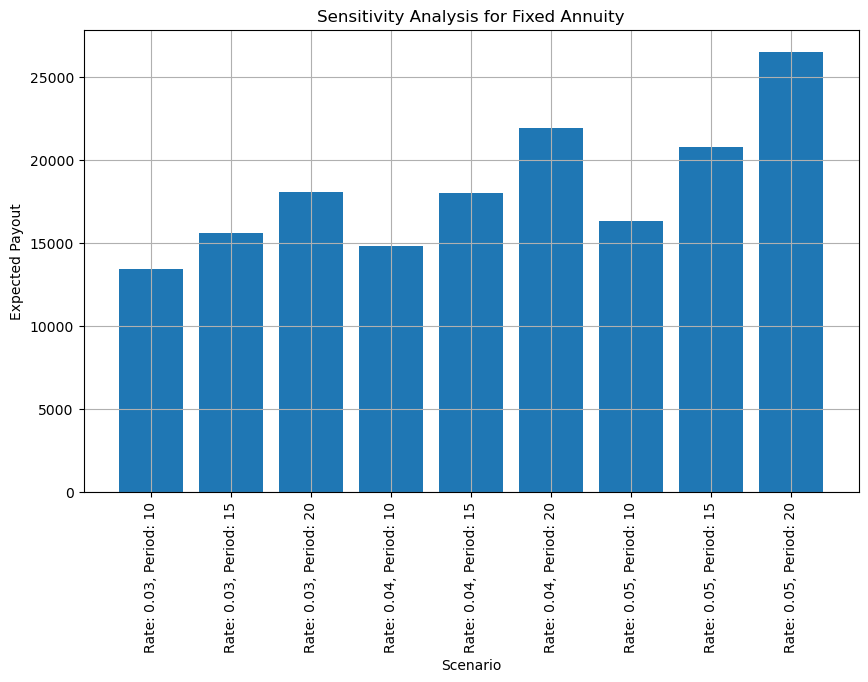

In [30]:
# Plot the sensitivity analysis for fixed annuity
plt.figure(figsize=(10, 6))
plt.bar(range(len(interest_rates) * len(investment_periods)), fixed_expected_payouts)
plt.xlabel('Scenario')
plt.ylabel('Expected Payout')
plt.title('Sensitivity Analysis for Fixed Annuity')
plt.xticks(range(len(interest_rates) * len(investment_periods)),
           [f'Rate: {rate}, Period: {period}' for rate in interest_rates for period in investment_periods],
           rotation=90)
plt.grid(True)
plt.show()

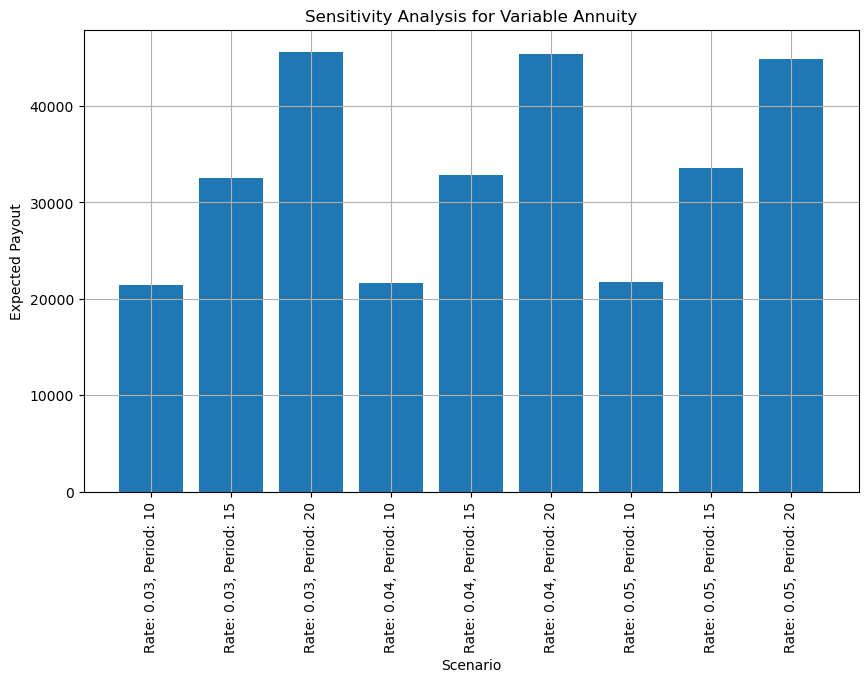

In [31]:
# Plot the sensitivity analysis for variable annuity
plt.figure(figsize=(10, 6))
plt.bar(range(len(interest_rates) * len(investment_periods)), variable_expected_payouts)
plt.xlabel('Scenario')
plt.ylabel('Expected Payout')
plt.title('Sensitivity Analysis for Variable Annuity')
plt.xticks(range(len(interest_rates) * len(investment_periods)),
           [f'Rate: {rate}, Period: {period}' for rate in interest_rates for period in investment_periods],
           rotation=90)
plt.grid(True)
plt.show()

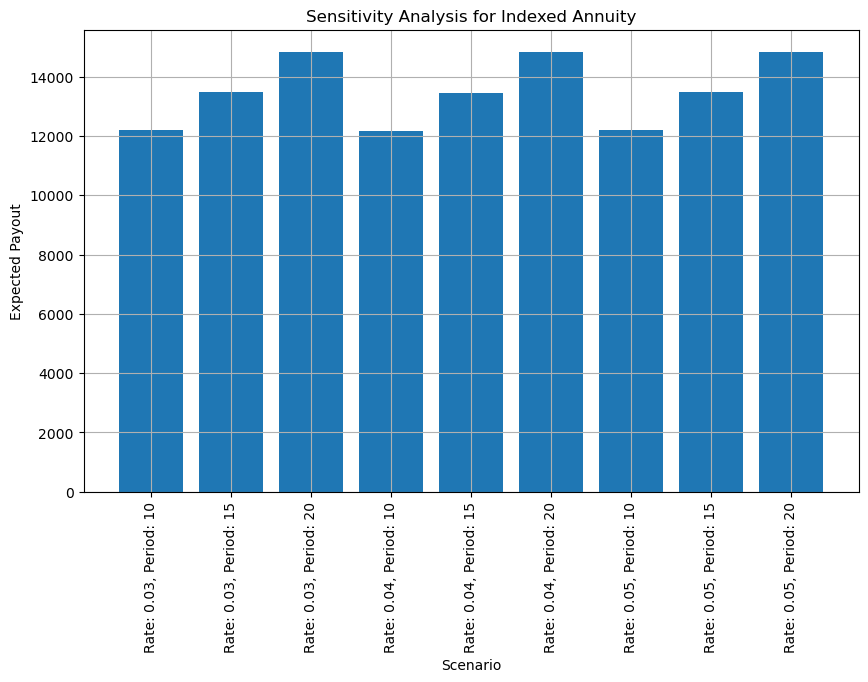

In [32]:
# Plot the sensitivity analysis for indexed annuity
plt.figure(figsize=(10, 6))
plt.bar(range(len(interest_rates) * len(investment_periods)), indexed_expected_payouts)
plt.xlabel('Scenario')
plt.ylabel('Expected Payout')
plt.title('Sensitivity Analysis for Indexed Annuity')
plt.xticks(range(len(interest_rates) * len(investment_periods)),
           [f'Rate: {rate}, Period: {period}' for rate in interest_rates for period in investment_periods],
           rotation=90)
plt.grid(True)
plt.show()